In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, Conv2D, Flatten, Reshape, Conv1D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import data_processing
import feature_extraction

In [2]:
df = data_processing.read_all_users('geolife_trajectories')
df = data_processing.process_classes(df)
df = data_processing.drop_unlabelled(df)

[1/182] processing user 135
[2/182] processing user 132
[3/182] processing user 104
[4/182] processing user 103
[5/182] processing user 168
[6/182] processing user 157
[7/182] processing user 150
[8/182] processing user 159
[9/182] processing user 166
[10/182] processing user 161
[11/182] processing user 102
[12/182] processing user 105
[13/182] processing user 133
[14/182] processing user 134
[15/182] processing user 160
[16/182] processing user 158
[17/182] processing user 167
[18/182] processing user 151
[19/182] processing user 169
[20/182] processing user 156
[21/182] processing user 024
[22/182] processing user 023
[23/182] processing user 015
[24/182] processing user 012
[25/182] processing user 079
[26/182] processing user 046
[27/182] processing user 041
[28/182] processing user 048
[29/182] processing user 077
[30/182] processing user 083
[31/182] processing user 084
[32/182] processing user 070
[33/182] processing user 013
[34/182] processing user 014
[35/182] processing use

In [3]:
df = data_processing.create_segments(df)

In [4]:
#df = data_processing.read_all_users('Geolife_data')
df = data_processing.calculations(df)

In [5]:
df = data_processing.filter(df)

In [6]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,jerk,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
0,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.405988,101.0,-0.028937,0.001048,119.216746,29.987477,7.198863,0.296906,-0.003176
1,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.637262,105.0,0.002203,0.000297,184.382087,65.165341,0.362918,0.620622,0.003083
2,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,3.874367,23.0,0.140744,0.006024,193.267409,8.885322,0.835518,0.386318,-0.010187
3,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.455316,105.0,-0.032562,-0.001651,167.650102,25.617307,7.509185,0.243974,-0.001356
4,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.494039,83.0,-0.288581,0.020095,240.783546,166.621353,48.482432,2.007486,-0.199646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166298,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,25133,0.000994,0.715602,5.0,-0.048476,-0.007360,89.999996,16.175060,0.338707,3.235012,-0.347141
4166299,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,25133,0.001291,0.929685,5.0,0.042817,0.018259,81.748068,8.251929,0.230275,1.650386,-0.316925
4166300,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,25133,0.001873,1.348481,5.0,0.083759,0.008188,332.943923,108.804144,0.310568,21.760829,4.022089
4166301,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,25133,0.001479,1.064751,5.0,-0.056746,-0.028101,331.310690,1.633234,0.266475,0.326647,-4.286836


In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,jerk,bearing,heading_change,Vrate,angular_velocity,angular_acceleration
0,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.405988,101.0,-0.028937,0.001048,119.216746,29.987477,7.198863,0.296906,-0.003176
1,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.637262,105.0,0.002203,0.000297,184.382087,65.165341,0.362918,0.620622,0.003083
2,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,3.874367,23.0,0.140744,0.006024,193.267409,8.885322,0.835518,0.386318,-0.010187
3,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.455316,105.0,-0.032562,-0.001651,167.650102,25.617307,7.509185,0.243974,-0.001356
4,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.494039,83.0,-0.288581,0.020095,240.783546,166.621353,48.482432,2.007486,-0.199646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166298,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,25133,0.000994,0.715602,5.0,-0.048476,-0.007360,89.999996,16.175060,0.338707,3.235012,-0.347141
4166299,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,25133,0.001291,0.929685,5.0,0.042817,0.018259,81.748068,8.251929,0.230275,1.650386,-0.316925
4166300,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,25133,0.001873,1.348481,5.0,0.083759,0.008188,332.943923,108.804144,0.310568,21.760829,4.022089
4166301,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,25133,0.001479,1.064751,5.0,-0.056746,-0.028101,331.310690,1.633234,0.266475,0.326647,-4.286836


In [6]:
# Add a unique index column to the DataFrame
df['unique_index'] = range(1, len(df) + 1)

# Display the DataFrame to verify
df.head()

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,jerk,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
0,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,0.405988,101.0,-0.028937,0.001048,119.216746,29.987477,7.198863,0.296906,-0.003176,1
1,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,0.637262,105.0,0.002203,0.000297,184.382087,65.165341,0.362918,0.620622,0.003083,2
2,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,3.874367,23.0,0.140744,0.006024,193.267409,8.885322,0.835518,0.386318,-0.010187,3
3,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,0.455316,105.0,-0.032562,-0.001651,167.650102,25.617307,7.509185,0.243974,-0.001356,4
4,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,0.494039,83.0,-0.288581,0.020095,240.783546,166.621353,48.482432,2.007486,-0.199646,5


In [23]:
# Save the first 10,000 data points to a CSV file
df.head(50000).to_csv('HIER.csv', index=False)

Plot features over time

In [7]:
df = df.sort_values(by=['segment', 'time'])


bike

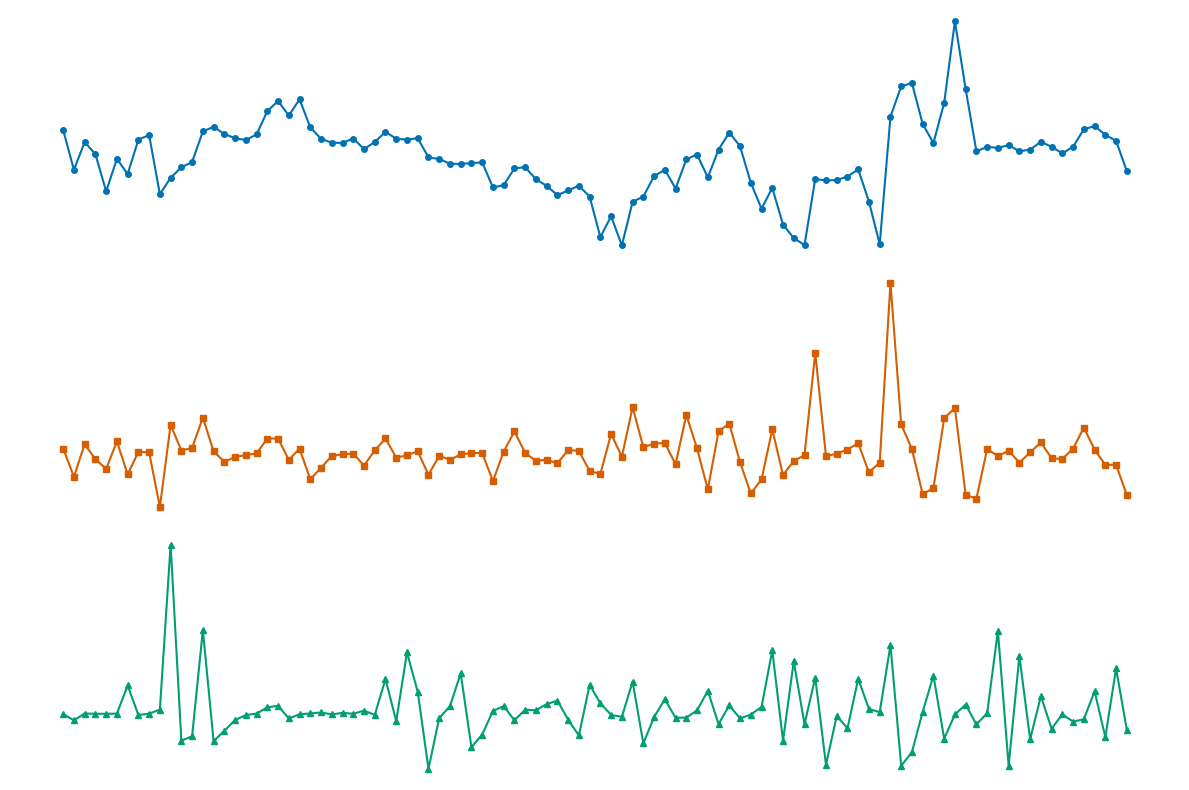

In [17]:
# Select first 100 data points
subset = df[900:1000]

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Speed
axes[0].plot(subset.index, subset['speed'], marker='o', linestyle='-', color='#0072B2', markersize=4, linewidth=1.5)
#axes[0].set_title('Speed', fontsize=14, fontweight='bold', color='#333333')

# Plot Acceleration
axes[1].plot(subset.index, subset['acceleration'], marker='s', linestyle='-', color='#D55E00', markersize=4, linewidth=1.5)
#axes[1].set_title('Acceleration', fontsize=14, fontweight='bold', color='#333333')


# Plot Angular Acceleration
axes[2].plot(subset.index, subset['angular_acceleration'], marker='^', linestyle='-', color='#009E73', markersize=4, linewidth=1.5)
#axes[2].set_title('Angular', fontsize=14, fontweight='bold', color='#333333')

# Remove all axes, labels, and boxes
for ax in axes:
    # Remove grid
    ax.grid(False)
    
    # Remove x-axis and y-axis labels, ticks, and numbers
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Remove plot borders
    for spine in ax.spines.values():
        spine.set_visible(False)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

car

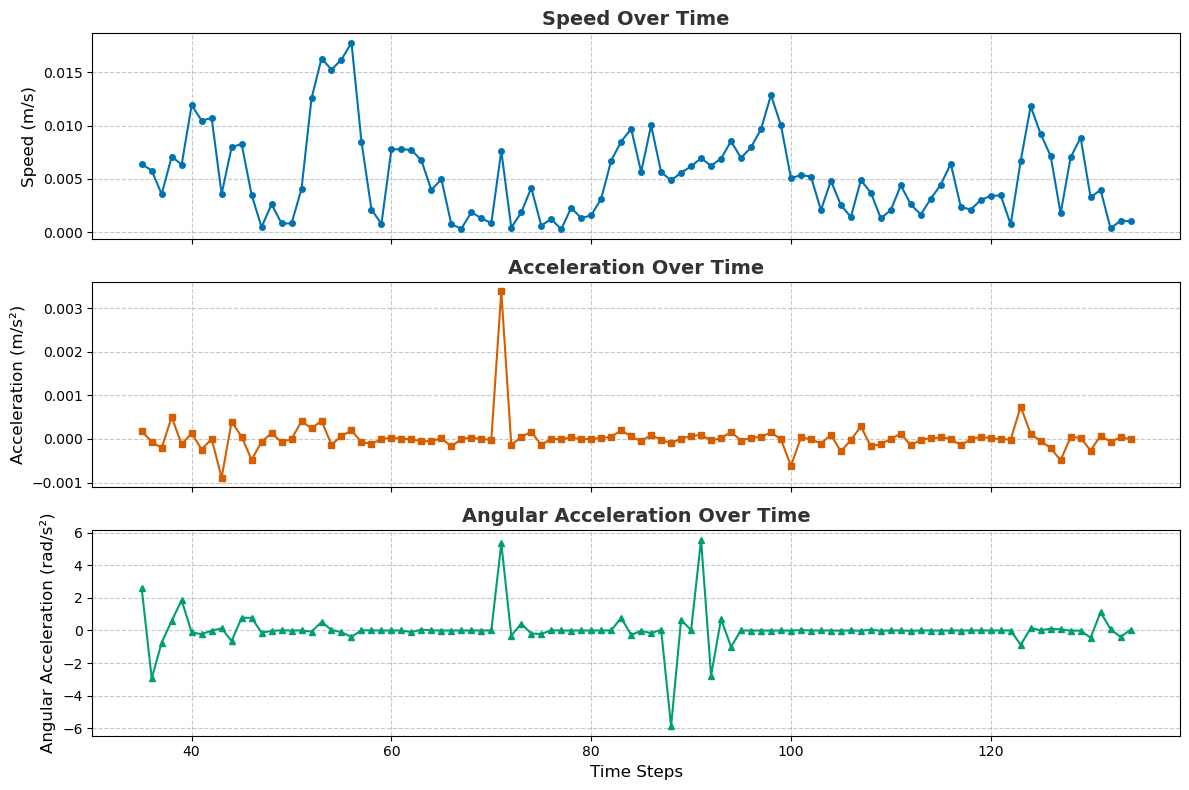

In [ ]:

# Select first 100 data points
subset = df.iloc[3150:3250]

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot Speed
axes[0].plot(subset.index, subset['speed'], marker='o', linestyle='-', color='#0072B2', markersize=4, linewidth=1.5)
axes[0].set_ylabel('Speed (m/s)', fontsize=12)
axes[0].set_title('Speed Over Time', fontsize=14, fontweight='bold', color='#333333')

# Plot Acceleration
axes[1].plot(subset.index, subset['acceleration'], marker='s', linestyle='-', color='#D55E00', markersize=4, linewidth=1.5)
axes[1].set_ylabel('Acceleration (m/s²)', fontsize=12)
axes[1].set_title('Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')


# Plot Angular Acceleration
axes[2].plot(subset.index, subset['angular_acceleration'], marker='^', linestyle='-', color='#009E73', markersize=4, linewidth=1.5)
axes[2].set_ylabel('Angular Acceleration (rad/s²)', fontsize=12)
axes[2].set_xlabel('Time Steps', fontsize=12)
axes[2].set_title('Angular Acceleration Over Time', fontsize=14, fontweight='bold', color='#333333')

# Improve layout and show grid
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.tick_params(axis='both', labelsize=10)

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

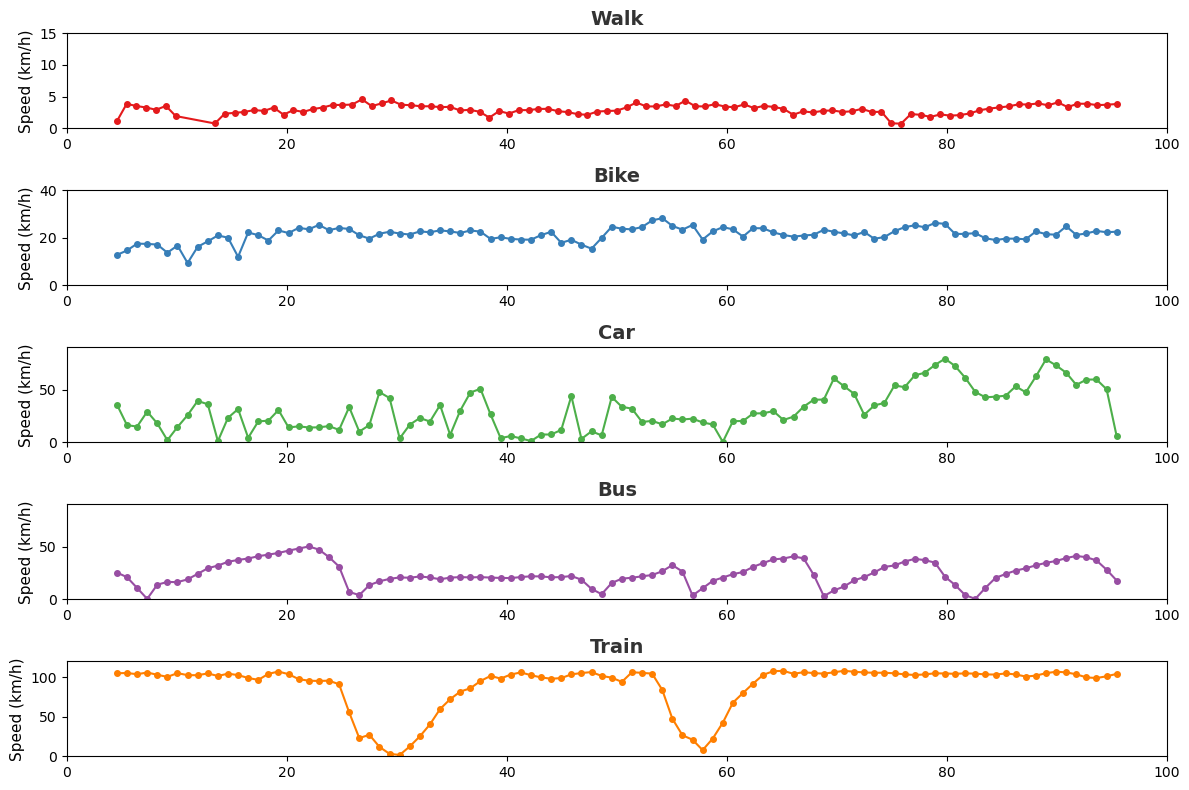

In [8]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)
#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['speed'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Speed (km/h)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')
axes[0].set_ylim(0,15)


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot( subset_bike['speed'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Speed (km/h)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')
axes[1].set_ylim(0,40)

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot( subset_car['speed'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Speed (km/h)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')
axes[2].set_ylim(0,90)

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot(subset_car.index, subset_car['speed'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Speed (km/h)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')
axes[3].set_ylim(0,90)

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['speed'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Speed (km/h)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')
axes[4].set_ylim(0,120)
#axes[4].set_xticks([0,20,40,60,80,100])


# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])

# Adjust spacing and show the plot
plt.tight_layout()
# Save the plot to a file
plt.savefig("Graphs/speed_over_time.png", dpi=300)
plt.show()

Acceleration

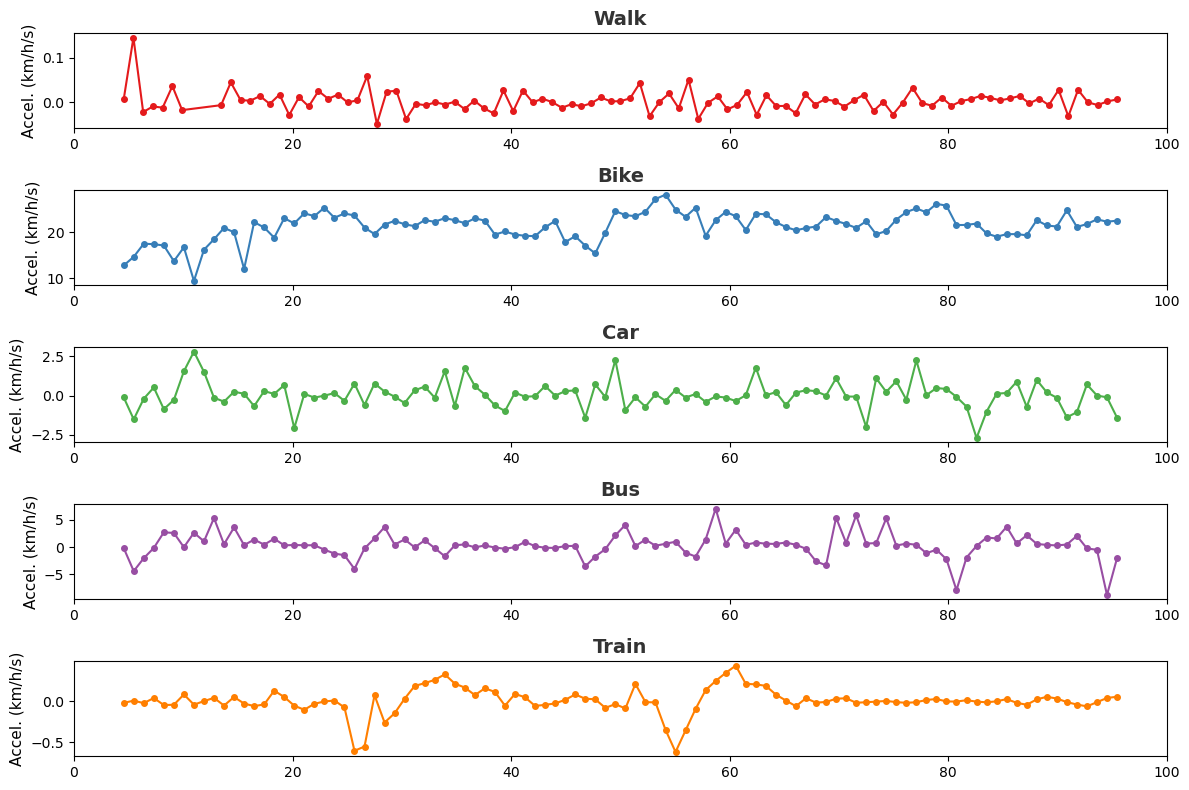

In [7]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)

#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['acceleration'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Accel. (km/h/s)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot( subset_bike['speed'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Accel. (km/h/s)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Accel. (km/h/s)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Accel. (km/h/s)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Accel. (km/h/s)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')

# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])

# Adjust spacing and show the plot
plt.tight_layout()
plt.savefig("Graphs/acceleration_over_time.png", dpi=300)
plt.show()

Jerk

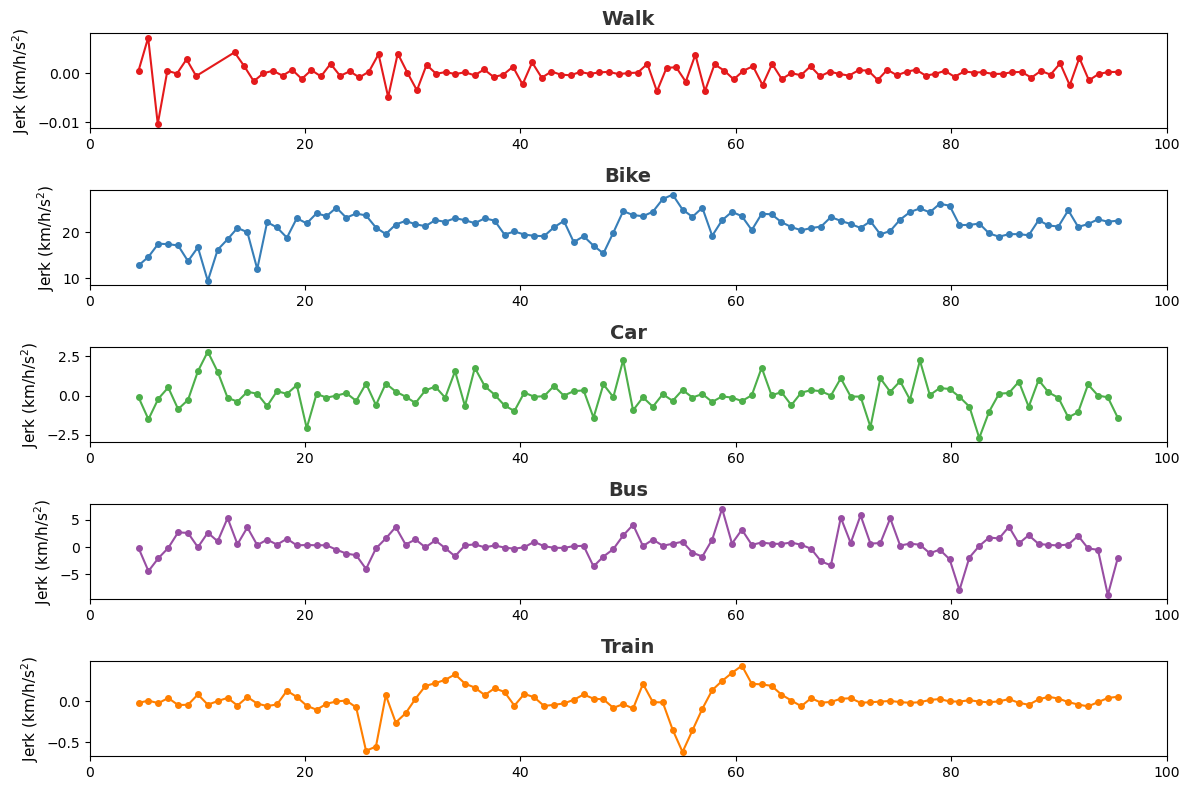

In [8]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)

#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['jerk'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Jerk (km/h/s$^2$)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot( subset_bike['speed'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Jerk (km/h/s$^2$)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Jerk (km/h/s$^2$)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Jerk (km/h/s$^2$)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['acceleration'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Jerk (km/h/s$^2$)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')
# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


# Adjust spacing and show the plot
plt.tight_layout()
plt.savefig("Graphs/jerk_over_time.png", dpi=300)
plt.show()

Bearing

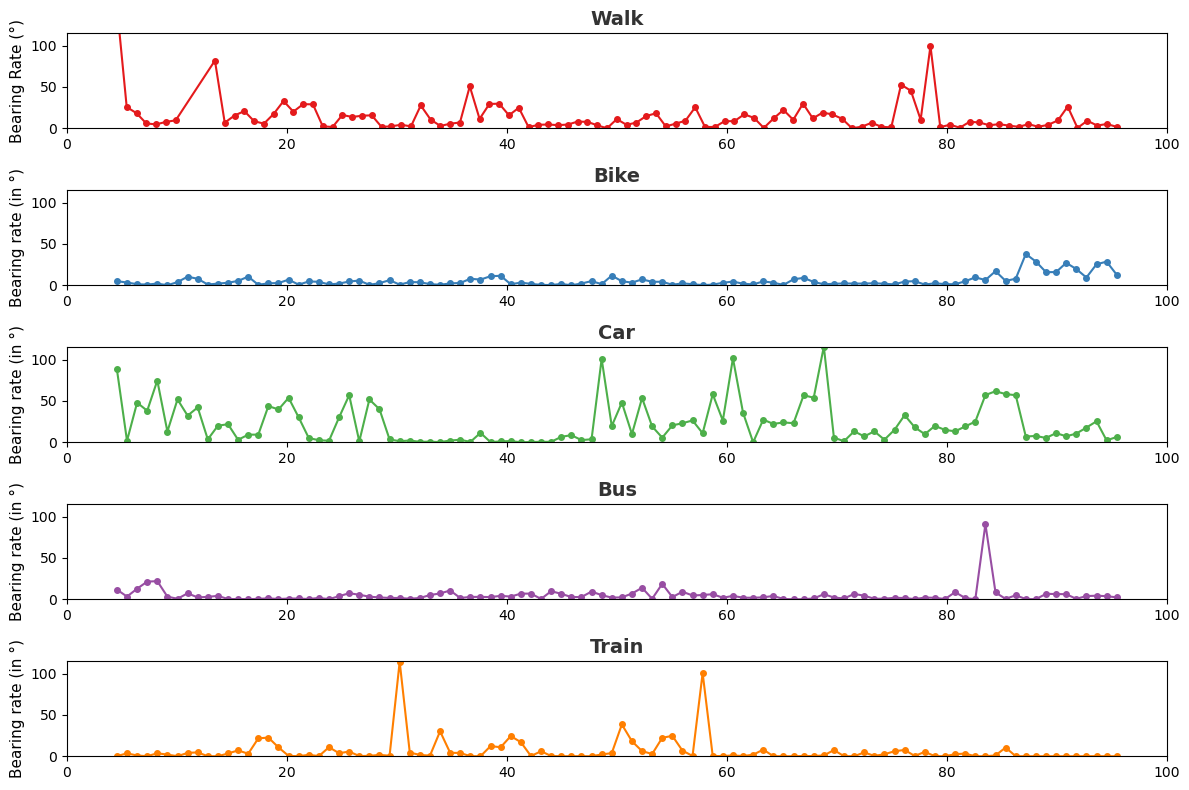

In [26]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)
#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['heading_change'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Bearing Rate (°)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')
axes[0].set_ylim(0,115)


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot( subset_bike['heading_change'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Bearing rate (in °)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')
axes[1].set_ylim(0,115)

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot( subset_car['heading_change'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Bearing rate (in °)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')
axes[2].set_ylim(0,115)

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot( subset_car['heading_change'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Bearing rate (in °)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')
axes[3].set_ylim(0,115)

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['heading_change'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Bearing rate (in °)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')
axes[4].set_ylim(0,115)
#axes[4].set_xticks([0,20,40,60,80,100])


# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])

# Adjust spacing and show the plot
plt.tight_layout()
# Save the plot to a file
plt.savefig("Graphs/bearing_over_time.png", dpi=300)
plt.show()

Angular Velocity

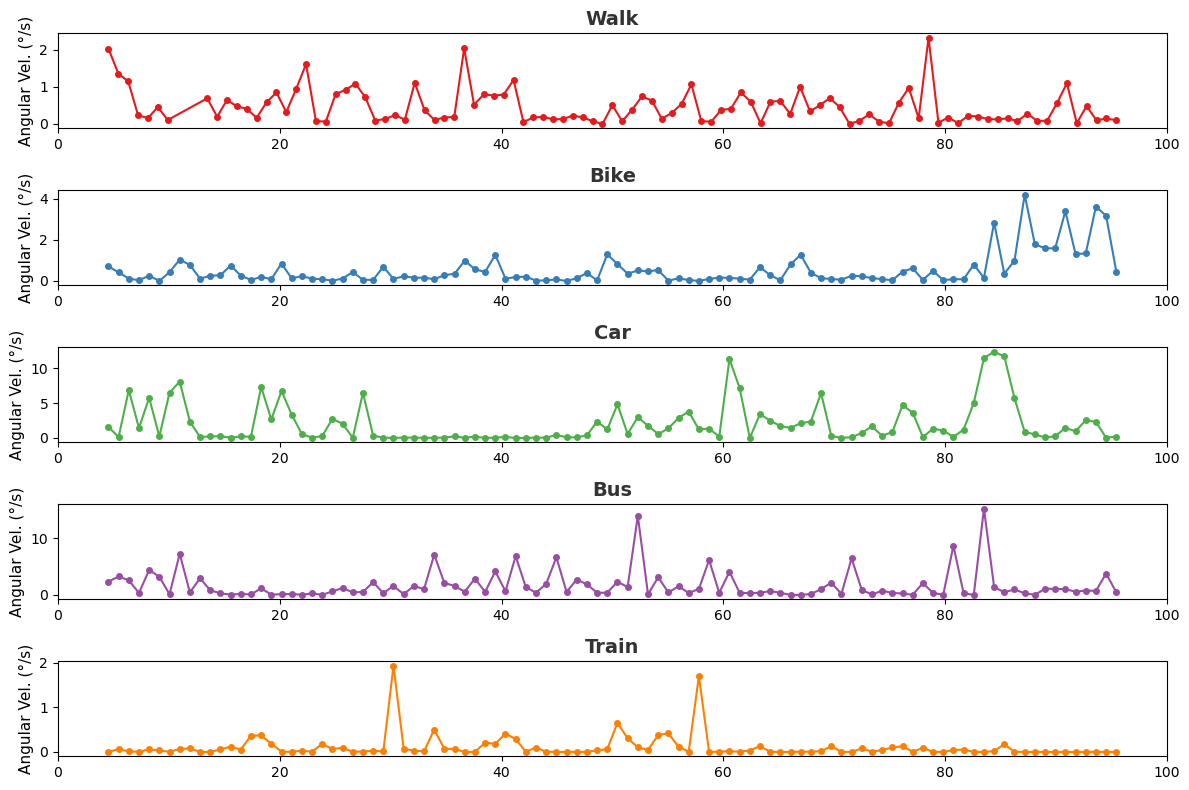

In [9]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)

#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['angular_velocity'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Angular Vel. (°/s)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot(subset_bike['angular_velocity'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Angular Vel. (°/s)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot(subset_car.index, subset_car['angular_velocity'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Angular Vel. (°/s)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot(subset_car.index, subset_car['angular_velocity'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Angular Vel. (°/s)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['angular_velocity'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Angular Vel. (°/s)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')

# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])


# Adjust spacing and show the plot
plt.tight_layout()
plt.savefig("Graphs/angular_velocity_over_time.png", dpi=300)
plt.show()

Angular Acceleration

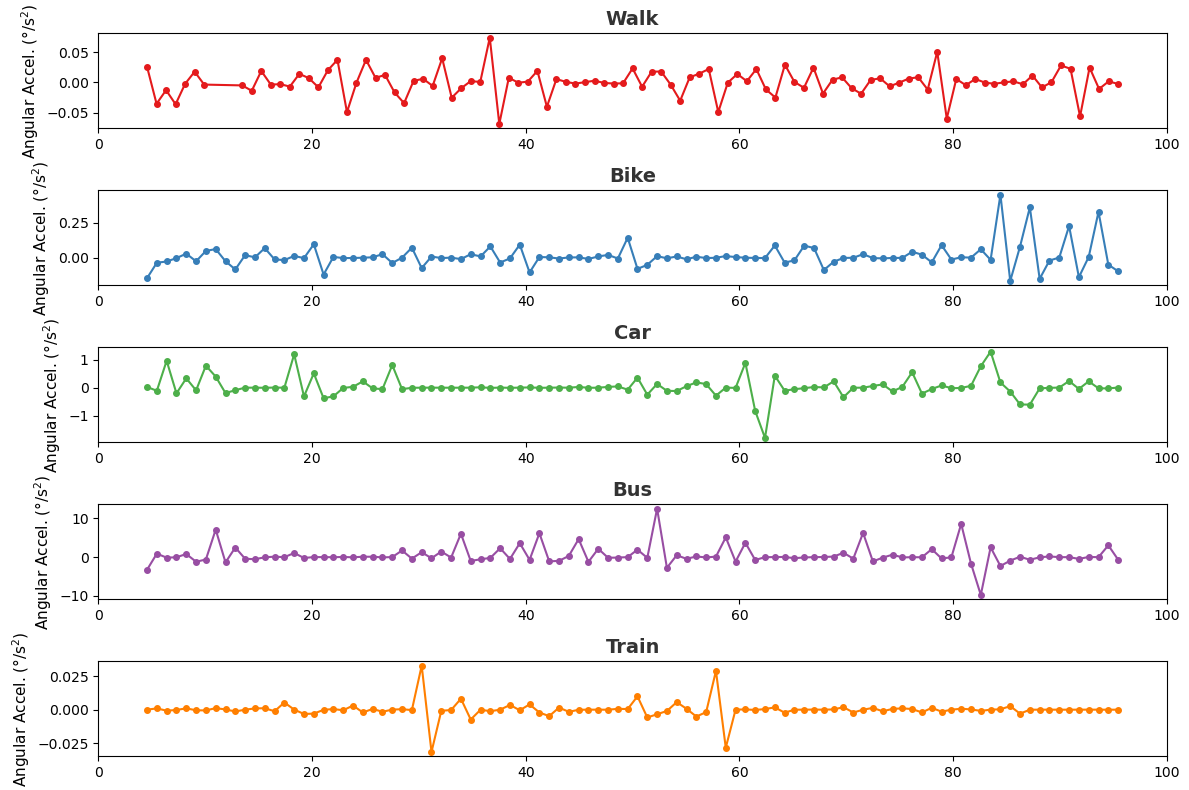

In [10]:
color_palette = sns.color_palette("Set1", 8)

# Create a figure with subplots
fig, axes = plt.subplots(5, 1, figsize=(12, 8), sharex=False)

#Plot Walk
subset_walk = df[(df['unique_index'] >= 7730) & (df['unique_index'] < 7830)]
axes[0].plot(subset_walk['angular_acceleration'], marker='o', linestyle='-', color=color_palette[0], markersize=4, linewidth=1.5)
axes[0].set_ylabel('Angular Accel. (°/s$^2$)', fontsize=11)
axes[0].set_title('Walk', fontsize=14, fontweight='bold', color='#333333')


# Plot Bike
subset_bike = df[(df['unique_index'] >= 738) & (df['unique_index'] < 838)]
axes[1].plot(subset_bike['angular_acceleration'], marker='o', linestyle='-', color=color_palette[1], markersize=4, linewidth=1.5)
axes[1].set_ylabel('Angular Accel. (°/s$^2$)', fontsize=11)
axes[1].set_title('Bike', fontsize=14, fontweight='bold', color='#333333')

#Plot Car
subset_car  = df[(df['unique_index'] >= 31818) & (df['unique_index'] < 31918)]
axes[2].plot(subset_car.index, subset_car['angular_acceleration'], marker='o', linestyle='-', color=color_palette[2], markersize=4, linewidth=1.5)
axes[2].set_ylabel('Angular Accel. (°/s$^2$)', fontsize=11)
axes[2].set_title('Car', fontsize=14, fontweight='bold', color='#333333')

#Plot Bus
subset_car  = df[(df['unique_index'] >= 44420) & (df['unique_index'] < 44520)]
axes[3].plot(subset_car.index, subset_car['angular_acceleration'], marker='o', linestyle='-', color=color_palette[3], markersize=4, linewidth=1.5)
axes[3].set_ylabel('Angular Accel. (°/s$^2$)', fontsize=11)
axes[3].set_title('Bus', fontsize=14, fontweight='bold', color='#333333')

#Plot Train
subset_car  = df[(df['unique_index'] >= 42850) & (df['unique_index'] < 42950)]
axes[4].plot(subset_car.index, subset_car['angular_acceleration'], marker='o', linestyle='-', color=color_palette[4], markersize=4, linewidth=1.5)
axes[4].set_ylabel('Angular Accel. (°/s$^2$)', fontsize=11)
axes[4].set_title('Train', fontsize=14, fontweight='bold', color='#333333')

# Ticks and labels
for ax in axes:
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int((x - ax.get_xlim()[0])/ (ax.get_xlim()[1] - ax.get_xlim()[0]) * 100)}'))
    ax.set_xticks(np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 6))
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])

# Adjust spacing and show the plot
plt.tight_layout()
plt.savefig("Graphs/angular_acceleration_over_time.png", dpi=300)
plt.show()

In [8]:
df

,lat,lon,alt,elapsed time,time,trajectory,label,user
0,39.974294,116.399741,492.000000,39816.056644,2009-01-03 01:21:34,20090103012134.plt,0,135
1,39.974292,116.399592,492.000000,39816.056655,2009-01-03 01:21:35,20090103012134.plt,0,135
2,39.974309,116.399523,492.000000,39816.056667,2009-01-03 01:21:36,20090103012134.plt,0,135
3,39.974320,116.399588,492.000000,39816.056690,2009-01-03 01:21:38,20090103012134.plt,0,135
4,39.974365,116.399730,491.000000,39816.056701,2009-01-03 01:21:39,20090103012134.plt,0,135
...,...,...,...,...,...,...,...,...
28,39.973817,116.324117,265.748031,39286.418252,2007-07-23 10:02:17,20070723033153.plt,0,171
29,39.973333,116.323683,265.748031,39286.419028,2007-07-23 10:03:24,20070723033153.plt,0,171
30,39.973733,116.323250,364.173228,39286.419421,2007-07-23 10:03:58,20070723033153.plt,0,171
31,39.973317,116.322967,246.062992,39286.420243,2007-07-23 10:05:09,20070723033153.plt,0,171


Select features for time-series analysis

In [56]:
time_series_features = ['speed', 'acceleration', 'angular_acceleration']

Normalize Time-Series features -> normalize ich alles oder nur X?

In [57]:
scaler = StandardScaler()
df[time_series_features] = scaler.fit_transform(df[time_series_features])
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,bike,163,3,0.011390,-0.762483,101.0,-0.010112,119.216746,29.987477,7.198863,-0.296906,-0.009701,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,bike,163,3,0.018587,-0.756048,105.0,-0.004894,184.382087,65.165341,0.362918,0.620622,-0.009423,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,bike,163,3,0.024753,-0.665980,23.0,0.018319,193.267409,8.885322,0.835518,0.386318,-0.009719,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,bike,163,3,0.013280,-0.761111,105.0,-0.010719,167.650102,25.617307,7.509185,-0.243974,-0.009654,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,bike,163,4,0.011390,-0.760033,83.0,-0.053617,240.783546,166.621353,48.482432,2.007486,-0.005684,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,walk,102,19001,0.000994,-0.753868,5.0,-0.013386,89.999996,16.175060,0.338707,3.235012,-0.014985,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,walk,102,19001,0.001291,-0.747912,5.0,0.001911,81.748068,8.251929,0.230275,-1.650386,-0.024829,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,walk,102,19001,0.001873,-0.736259,5.0,0.008771,332.943923,251.195856,0.310568,50.239171,0.152623,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,walk,102,19001,0.001479,-0.744154,5.0,-0.014771,331.310690,1.633234,0.266475,-0.326647,-0.167605,4185241


Encode Labels

In [58]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

Put into segments

In [59]:
df = data_processing.create_segments(df)
df

,lat,lon,alt,elapsed time,time,trajectory,label,user,segment,distance,speed,time_diff,acceleration,bearing,heading_change,Vrate,angular_velocity,angular_acceleration,unique_index
3,39.976200,116.330383,229.658793,39184.432917,2007-04-12 10:23:24,20070412102116.plt,0,163,1,0.011390,-0.762483,101.0,-0.010112,119.216746,29.987477,7.198863,-0.296906,-0.009701,1
4,39.976033,116.330367,259.186352,39184.434132,2007-04-12 10:25:09,20070412102116.plt,0,163,1,0.018587,-0.756048,105.0,-0.004894,184.382087,65.165341,0.362918,0.620622,-0.009423,2
5,39.975817,116.330300,275.590551,39184.434398,2007-04-12 10:25:32,20070412102116.plt,0,163,1,0.024753,-0.665980,23.0,0.018319,193.267409,8.885322,0.835518,0.386318,-0.009719,3
6,39.975700,116.330333,295.275591,39184.435613,2007-04-12 10:27:17,20070412102116.plt,0,163,1,0.013280,-0.761111,105.0,-0.010719,167.650102,25.617307,7.509185,-0.243974,-0.009654,4
10,39.975383,116.330667,137.795276,39184.611030,2007-04-12 14:39:53,20070412102116.plt,0,163,2,0.011390,-0.760033,83.0,-0.053617,240.783546,166.621353,48.482432,2.007486,-0.005684,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,39.991613,116.330468,0.000000,40908.637292,2011-12-31 15:17:42,20111231144437.plt,4,102,9226,0.000994,-0.753868,5.0,-0.013386,89.999996,16.175060,0.338707,3.235012,-0.014985,4185238
347,39.991615,116.330483,0.000000,40908.637350,2011-12-31 15:17:47,20111231144437.plt,4,102,9226,0.001291,-0.747912,5.0,0.001911,81.748068,8.251929,0.230275,-1.650386,-0.024829,4185239
348,39.991630,116.330473,0.000000,40908.637407,2011-12-31 15:17:52,20111231144437.plt,4,102,9226,0.001873,-0.736259,5.0,0.008771,332.943923,251.195856,0.310568,50.239171,0.152623,4185240
349,39.991642,116.330465,0.000000,40908.637465,2011-12-31 15:17:57,20111231144437.plt,4,102,9226,0.001479,-0.744154,5.0,-0.014771,331.310690,1.633234,0.266475,-0.326647,-0.167605,4185241


Group by trajectory to create sequence PROBLEM -> nicht jede trajectory hat das gleiche label!

In [60]:
X_sequences = []
y_sequences = []

for _, group in df.groupby('segment'):
    X_sequences.append(group[time_series_features].values)  # Raw sequences
    y_sequences.append(group['label'].iloc[0])  # Assign one label per segment

In [61]:
for i, seq in enumerate(X_sequences):
    print(f"Shape of sequence {i}: {seq.shape}")

Shape of sequence 0: (4, 3)
Shape of sequence 1: (44, 3)
Shape of sequence 2: (24, 3)
Shape of sequence 3: (38, 3)
Shape of sequence 4: (31, 3)
Shape of sequence 5: (44, 3)
Shape of sequence 6: (1, 3)
Shape of sequence 7: (21, 3)
Shape of sequence 8: (4, 3)
Shape of sequence 9: (26, 3)
Shape of sequence 10: (26, 3)
Shape of sequence 11: (15, 3)
Shape of sequence 12: (90, 3)
Shape of sequence 13: (73, 3)
Shape of sequence 14: (117, 3)
Shape of sequence 15: (20, 3)
Shape of sequence 16: (74, 3)
Shape of sequence 17: (15, 3)
Shape of sequence 18: (31, 3)
Shape of sequence 19: (41, 3)
Shape of sequence 20: (615, 3)
Shape of sequence 21: (805, 3)
Shape of sequence 22: (517, 3)
Shape of sequence 23: (20, 3)
Shape of sequence 24: (13, 3)
Shape of sequence 25: (7, 3)
Shape of sequence 26: (30, 3)
Shape of sequence 27: (22, 3)
Shape of sequence 28: (25, 3)
Shape of sequence 29: (58, 3)
Shape of sequence 30: (101, 3)
Shape of sequence 31: (3, 3)
Shape of sequence 32: (21, 3)
Shape of sequence 33

Plot the trajectory length

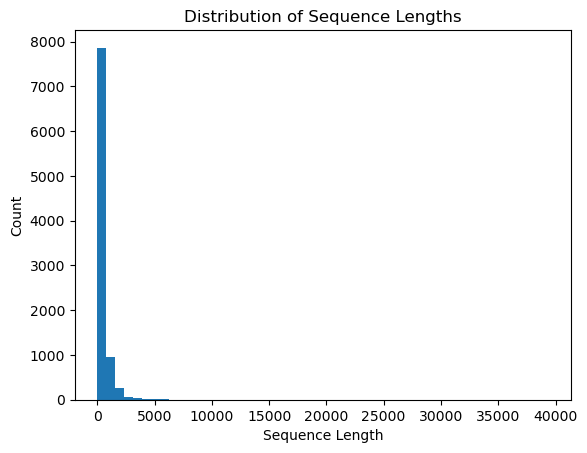

In [62]:
import matplotlib.pyplot as plt
import numpy as np

seq_lengths = [len(seq) for seq in X_sequences]
plt.hist(seq_lengths, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()